In [1]:
import torch
from torch.autograd import Variable

In [2]:
dataset = [] #list of tuples (image, label)

zer = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

one = torch.Tensor([[0, 0, 0, 1, 0],
                    [0, 0, 1, 1, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 1, 1, 1],
                   ])

two = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                   ])

thr = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

fou = torch.Tensor([[0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                   ])

fiv = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

six = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

sev = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                   ])

eig = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

nin = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

dataset.append((zer, torch.Tensor([0])))
dataset.append((one, torch.Tensor([1])))
dataset.append((two, torch.Tensor([2])))
dataset.append((thr, torch.Tensor([3])))
dataset.append((fou, torch.Tensor([4])))
dataset.append((fiv, torch.Tensor([5])))
dataset.append((six, torch.Tensor([6])))
dataset.append((sev, torch.Tensor([7])))
dataset.append((eig, torch.Tensor([8])))
dataset.append((nin, torch.Tensor([9])))



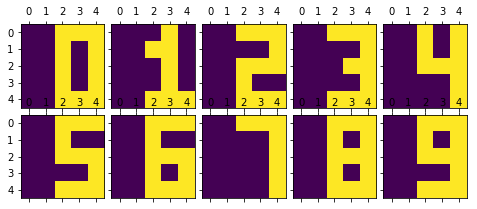

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

fig = plt.figure(1,(8., 8.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2 , 5),
                 axes_pad=0.1)

for i, (data, target) in enumerate(dataset):
    grid[i].matshow(Image.fromarray(data.numpy()))
    
plt.show()

In [4]:
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.output_layer = nn.Linear(5*5, 10)

    def forward(self, x):
        x = self.output_layer(x)
        return F.log_softmax(x)
    

In [5]:
model = Model()

In [6]:
def train(epochs, model, print_every=100):
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.1)
    snaps = []
    for epoch in range(epochs):
        model.train()
        avg_loss = 0
        for i, (data, target) in enumerate(dataset):
            data = data.view(1, -1)
            data, target = Variable(data), Variable(target.long())
            optimizer.zero_grad()
            output = model(data)

            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            avg_loss += loss.data[0]

        if not epoch % 10:
            print('epoch: {}, loss:{}'.format(epoch, avg_loss/len(dataset)/10))
            snaps.append(test_and_print(model, dataset))
            
    return snaps

epoch: 0, loss:0.22743652701377867
torch.Size([10, 1])
torch.Size([10])
correct: 1/10


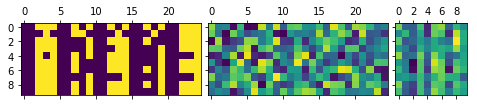

epoch: 10, loss:0.20758060455322264
torch.Size([10, 1])
torch.Size([10])
correct: 5/10


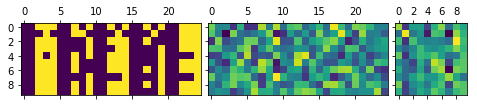

epoch: 20, loss:0.19082840919494629
torch.Size([10, 1])
torch.Size([10])
correct: 9/10


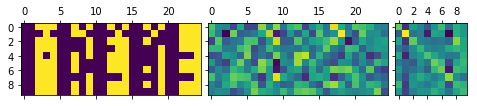

epoch: 30, loss:0.1760328507423401
torch.Size([10, 1])
torch.Size([10])
correct: 10/10


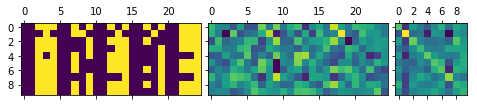

epoch: 40, loss:0.16294811069965362
torch.Size([10, 1])
torch.Size([10])
correct: 10/10


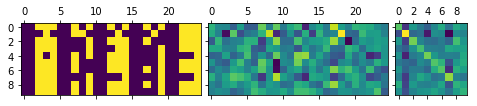

epoch: 50, loss:0.15138170182704927
torch.Size([10, 1])
torch.Size([10])
correct: 10/10


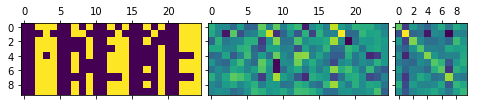

epoch: 60, loss:0.14113423585891724
torch.Size([10, 1])
torch.Size([10])
correct: 10/10


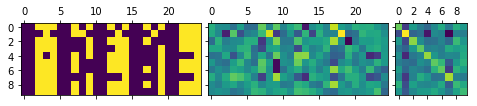

epoch: 70, loss:0.13202184140682222
torch.Size([10, 1])
torch.Size([10])
correct: 10/10


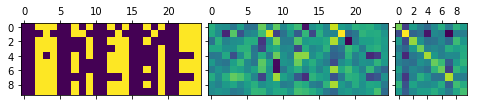

epoch: 80, loss:0.12388614565134048
torch.Size([10, 1])
torch.Size([10])
correct: 10/10


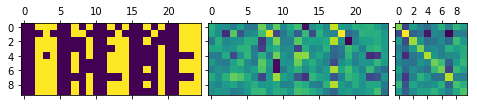

epoch: 90, loss:0.11659363955259323
torch.Size([10, 1])
torch.Size([10])
correct: 10/10


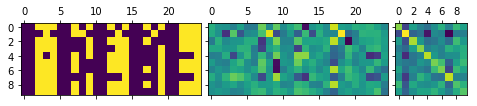

In [9]:
snaps = train(100, model)

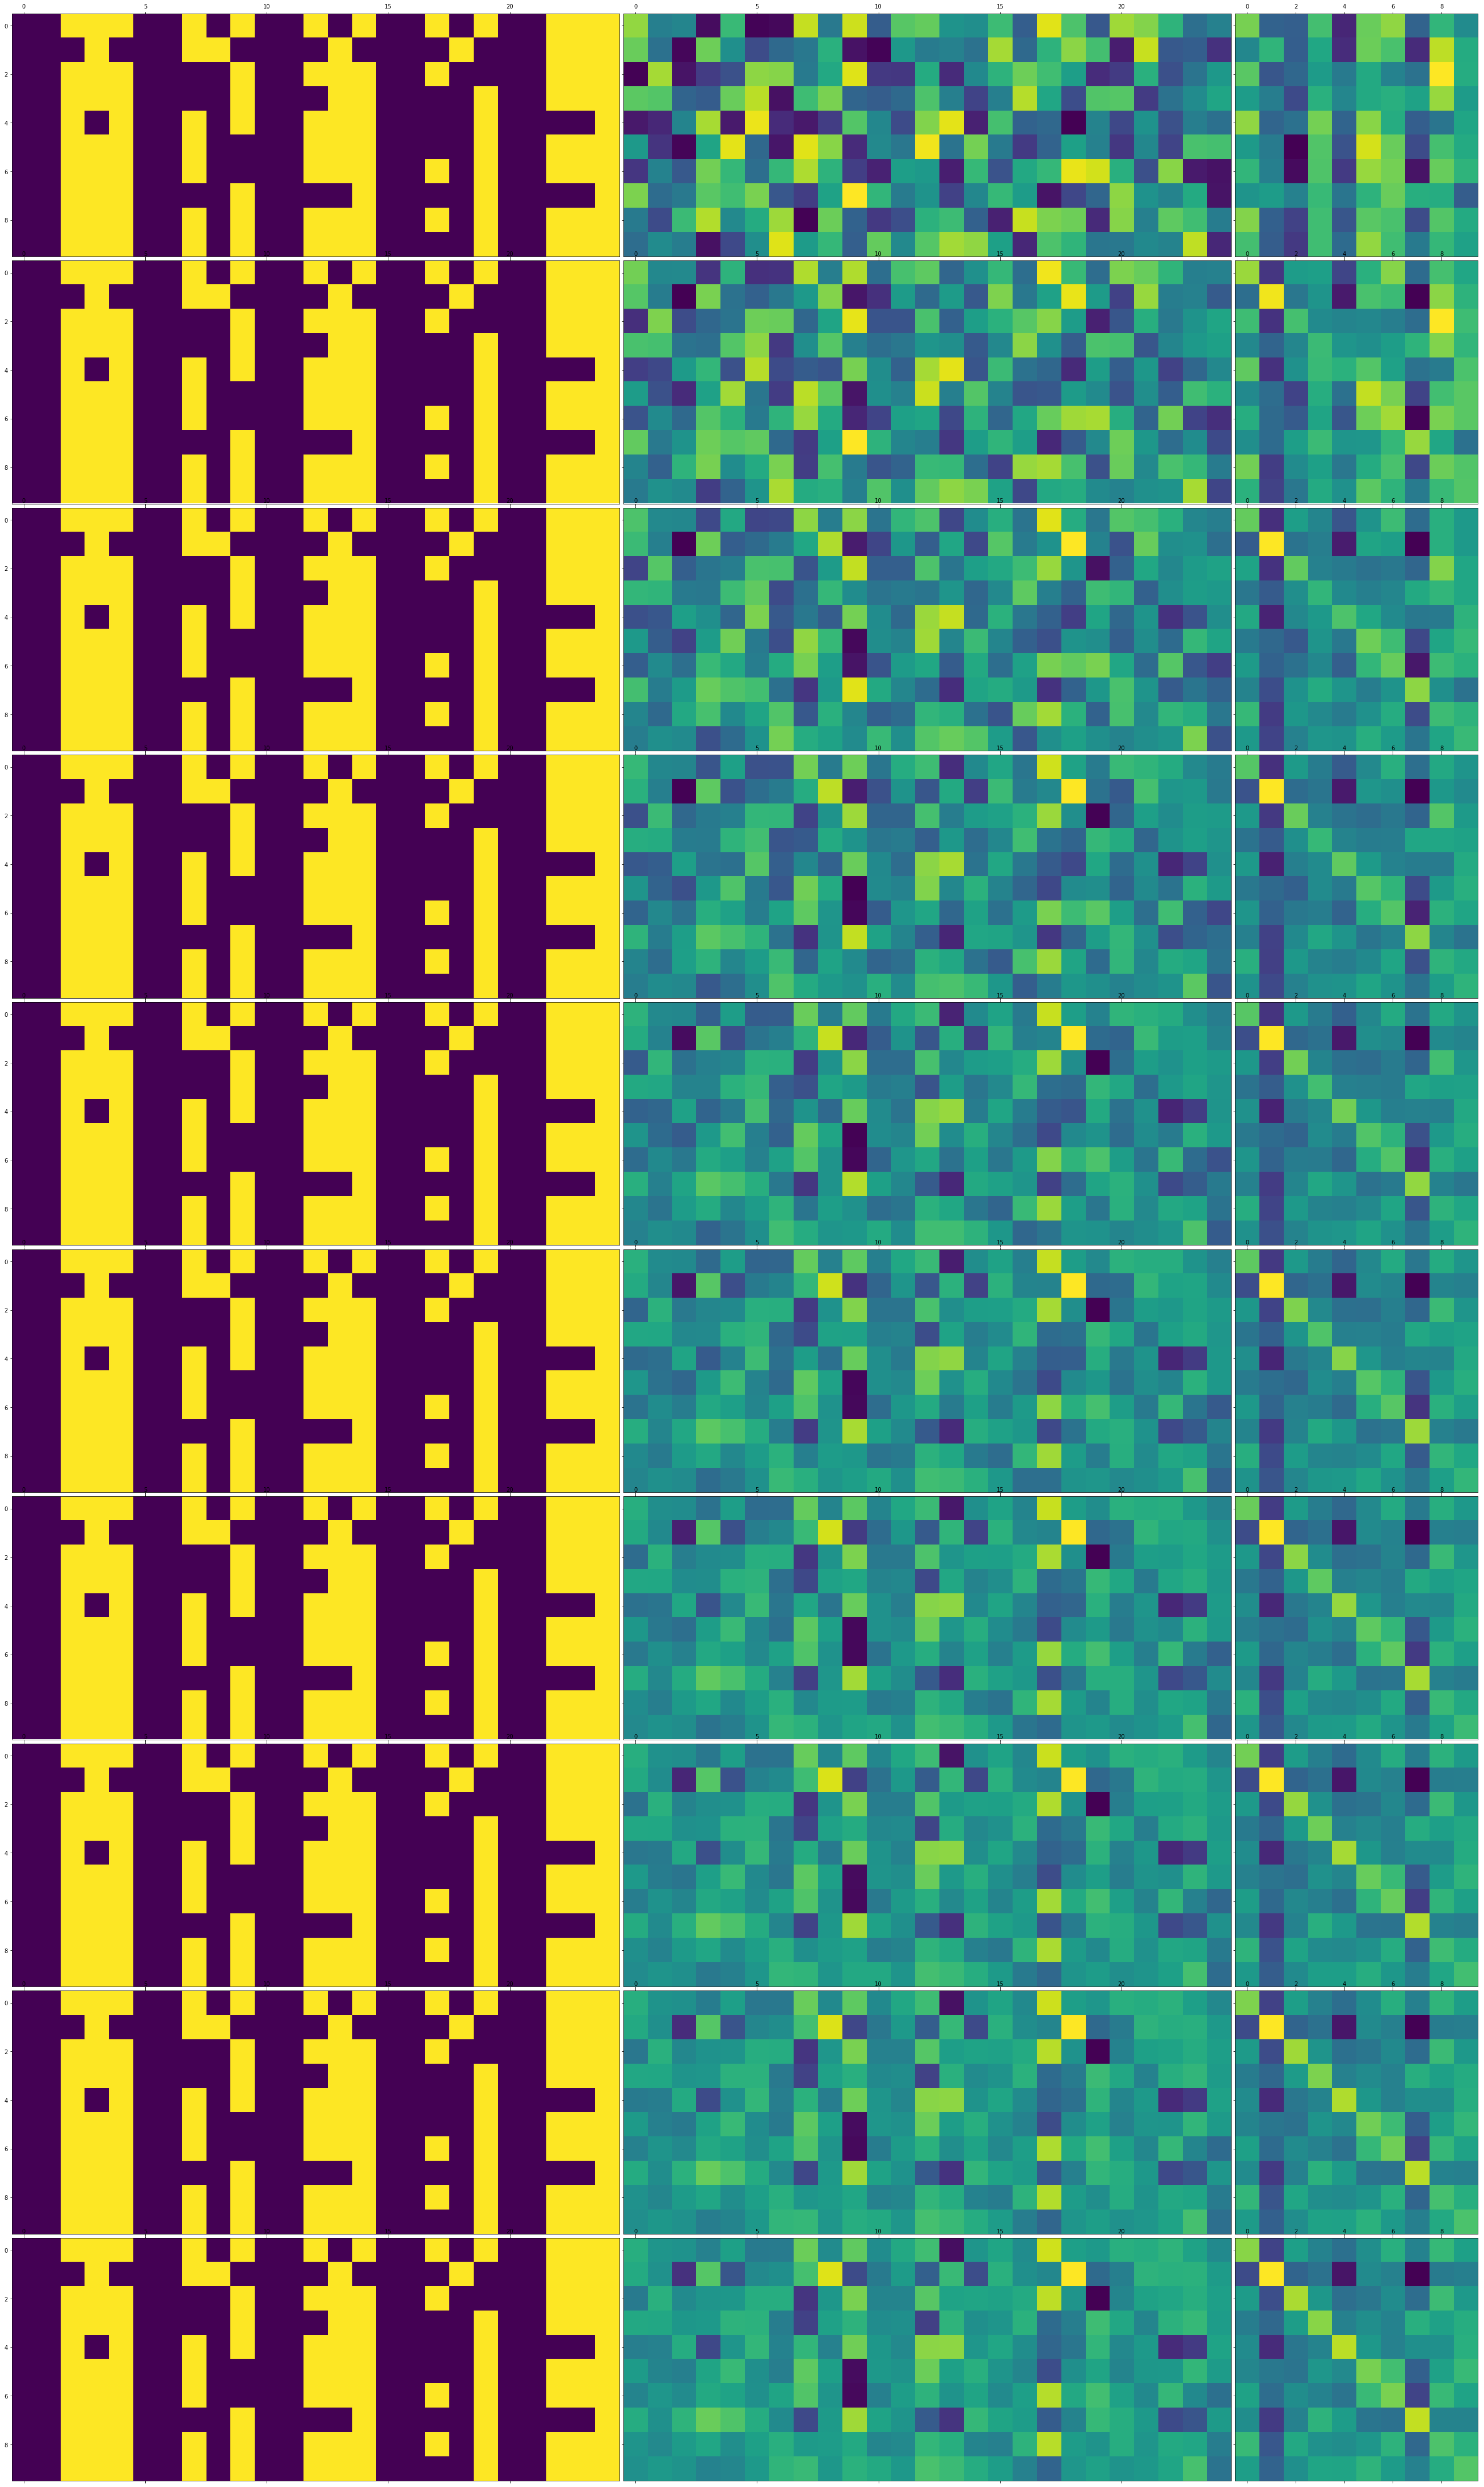

In [11]:
fig = plt.figure(1, (80., 80.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(len(snaps) , 3),
                     axes_pad=0.1)

for i, snap in enumerate(snaps):
    for j, image in enumerate(snap):
        grid[i * 3 + j].matshow(image)
        
plt.show()

In [ ]:
one = model(Variable(dataset[5][0].view(1, -1)))
print(one.max(1)[1])

In [8]:
def test_and_print(model, dataset):
    correct = 0
    loss = 0
    fig = plt.figure(1,(8., 8.))
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(1 , 3),
                     axes_pad=0.1)

    data = [data.view(1, -1) for data, target in dataset]
    data = torch.stack(data).squeeze()

    target = [target.view(1, -1) for data, target in dataset]
    target = torch.stack(target).squeeze()
    grid[0].matshow(Image.fromarray(data.numpy()))
    grid[1].matshow(Image.fromarray(model.output_layer.weight.data.numpy()))
    
    output = model(Variable(data))
    grid[2].matshow(Image.fromarray(output.data.numpy()))

    pred = output.data.max(1)[1] 
    print(pred.size())
    print(target.size())
    correct += pred.eq(target.long()).sum()
    
    print('correct: {}/{}'.format(correct, len(dataset)))
    
    plt.show()
    return Image.fromarray(data.numpy()), Image.fromarray(model.output_layer.weight.data.numpy()), Image.fromarray(output.data.numpy())

In [ ]:
test_and_print(model, dataset)